In [103]:
%matplotlib notebook
import os 

import numpy as np
import matplotlib.pyplot as plt

dtype = np.float32

n_pol = 2
n_dims = 2
file_paths = ["pre_stitch.dat", "post_stitch.dat", "post_shift.dat", "response_forward.dat", "response_inverse.dat"]
n_dat = [262144, 229376, 229376, 262144, 262144]

responses = []
for i in [1, 2]:

    with open(file_paths[i], "rb") as f:
        buffer = f.read()
        data = np.frombuffer(buffer, dtype=dtype)

    data = data.reshape((n_pol, n_dat[i], n_dims))
    data = data[:,:,0] + 1j*data[:,:,1]
    data = data.reshape((n_pol, n_dat[i]))
    responses.append(data)

In [94]:
def reshuffle_inverse_response(inverse_response, n_chan):
    n_dat = inverse_response.shape[-1]
    reshuffled = np.zeros(inverse_response.shape, dtype=inverse_response.dtype)

    dat_per_chan = int(n_dat / n_chan)
    dat_per_chan_2 = int(dat_per_chan / 2)

    for i in range(n_chan):
        idx = i*dat_per_chan
        reshuffled[idx:idx+dat_per_chan_2] = inverse_response[idx + dat_per_chan_2:idx + dat_per_chan]
        reshuffled[idx + dat_per_chan_2: idx + dat_per_chan] = inverse_response[idx:idx + dat_per_chan_2]

    return reshuffled

forward, inverse = responses
inverse = reshuffle_inverse_response(inverse, 8)
idx = np.where(forward != inverse)[0]
print(idx)

[16384]


<IPython.core.display.Javascript object>


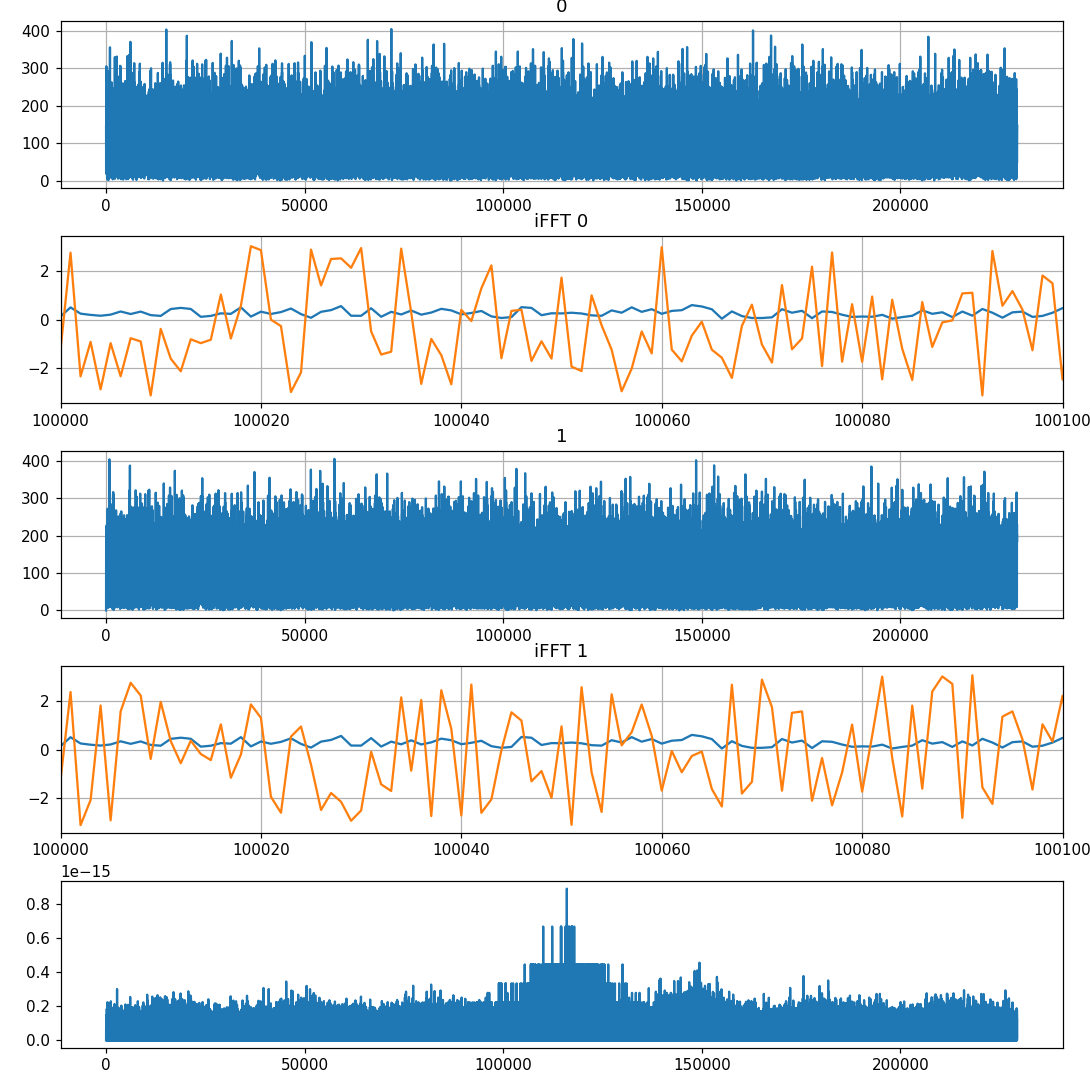

False
True


In [122]:
i_pol= 0
fig, axes = plt.subplots(len(responses)*2 + 1, 1, figsize=(10, 10))
if not hasattr(axes, "__getitem__"): 
    axes = [axes]
fig.tight_layout()

print(np.allclose(*responses))
fft_responses = []
for i in range(len(responses)):
    data = responses[i]
#     axes[pol].set_xlim([16382, 16386])
#     axes[pol].plot(np.real(data[pol,:]));
#     axes[pol].plot(np.imag(data[pol,:]));
#     axes[i].plot(np.angle(data[i_pol,:]));
    axes[2*i].plot(np.abs(data[i_pol,:]));
    axes[2*i].grid(True)
    axes[2*i].set_title(f"{i}")
    
    ifft = np.fft.ifft(data[i_pol,:])
    fft_responses.append(ifft)
    axes[2*i + 1].plot(np.abs(ifft));
    axes[2*i + 1].plot(np.angle(ifft));
    axes[2*i + 1].grid(True)
    axes[2*i + 1].set_title(f"iFFT {i}")
    axes[2*i + 1].set_xlim([1e5, 1e5 + 100])

mag = [np.abs(f) for f in fft_responses]
print(np.allclose(*mag))
axes[4].plot(np.abs(np.subtract(*[np.abs(f) for f in fft_responses])));
# corr = np.correlate(*[a[i_pol,:] for a in responses], "full")
# axes[2].plot(corr)
# axes[2].grid(True)